# Import libs

In [11]:
import os
import re
import time
import math
import pickle
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import IPython.display as Disp
from underthesea import word_tokenize
from operator import itemgetter
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

In [2]:
df_org = pd.read_csv('ican_se_139k.csv')
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139452 entries, 0 to 139451
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   QuestionID  139452 non-null  object
 1   ImageURL    139452 non-null  object
 2   ImageOCR    139452 non-null  object
dtypes: object(3)
memory usage: 3.2+ MB


In [3]:
df = df_org.copy()

In [4]:
def clean_function(text):  
    #lowercase
    text = text.lower()
    
#     #xoá ký tự đặc biệt, ký tự không phải alphanumeric 
#     text = re.sub("[^a-z0-9àáạảãâầấậẩẫăằắặẳẵèéẹẻẽêềếệểễòóọỏõôồốộổỗơờớợởỡìíịỉĩùúụủũưừứựửữỳýỵỷỹđ]",' ', text)
    
#     #xoá leading zero
#     text = [e.lstrip('0') for e in text.split(' ')]
#     text = (' ').join(text)
    
    #replace extra spaces with single space
    text = re.sub(' +',' ',text)
    
    #xoá khoảng trắng ở đầu và cuối mỗi câu
    text = text.strip()
    
    #word tokenzie
    text = word_tokenize(text, format='text')
    return text

In [5]:
check_dup = df['ImageOCR'][df['ImageOCR'].duplicated()]

df = df.drop(check_dup.index).reset_index(drop = True)
df.shape

(133888, 3)

In [6]:
t0 = time.time()

df['clean_question'] = df['ImageOCR'].map(lambda x: clean_function(x))
print('Cleaning dataset took {:.2f} minutes.'.format((time.time() - t0) / 60))

Cleaning dataset took 15.81 minutes.


In [7]:
df['char_count_question'] = df['clean_question'].str.len()
df['word_count_question'] = df['clean_question'].str.split().str.len()
df['average_word_length_question'] = df['char_count_question'] / df['word_count_question']

In [9]:
df.head()

,QuestionID,ImageURL,ImageOCR,clean_question,char_count_question,word_count_question,average_word_length_question
0,221207ad-45f4-11ed-813f-a6869563e5be,https://s3.icankid.io/uploads/question/20bdf490-45f4-11ed-afcb-abad28552b30,B-TƯLUÂN\n2.12. Biểu diễn miền nghiệm của bất phương trình \( \frac{x+y}{2} \geq \frac{2 x-y+1}{3} \) trên mặt phẳng toạ oô,b-tưluân 2.12 . biểu_diễn miền nghiệm của bất_phương_trình \ ( \ frac { x + y } { 2 }_\ geq \ frac { 2 x-y+1 } { 3 }_\ ) trên mặt_phẳng toạ oô,142,35,4.057143
1,59318f0d-45f4-11ed-813f-a6869563e5be,https://s3.icankid.io/uploads/question/57781e20-45f4-11ed-afcb-abad28552b30,"Câu 1: Học sinh chọn 1 trong 2 chủ đề sau?\nChủ đề 1 : Những nét chính về lịch sử hình thành, phát triển của lực lượng vũ trang nhân Việt Nam (LLVTNDVN)?\nChủ đề 2: Những nét chính về truyền thống anh hùng của LLVTNDVN?\nCâu 2: Muốn phấn đấu gia nhập vào LLVTNDVN là học \( \sinh \) THPT chúng ta cần chuẩn bị những nội dung gì?","câu 1 : học_sinh chọn 1 trong 2 chủ_đề sau ? chủ_đề 1 : những nét chính về lịch_sử hình_thành , phát_triển của lực_lượng_vũ_trang nhân việt nam ( llvtndvn ) ? chủ_đề 2 : những nét chính về truyền_thống anh_hùng của llvtndvn ? câu 2 : muốn phấn_đấu gia_nhập vào llvtndvn là học \ ( \_sinh \ ) thpt chúng_ta cần chuẩn_bị những nội_dung gì ?",338,66,5.121212
2,662de52e-45f4-11ed-813f-a6869563e5be,https://s3.icankid.io/uploads/question/651bc950-45f4-11ed-afcb-abad28552b30,3. Một cái bục hình lăng trụ đứng có kích thước như Hình 12.\na) Người ta muốn sơn tất cả các mặt của cái bục. Diện tích cần phải sơn là bao nhiêu?\nb) Tính thể tích của cái bục.,3 . một cái bục hình_lăng_trụ đứng có kích_thước như hình 12 ._a ) người_ta muốn sơn tất_cả các mặt của cái bục . diện_tích cần phải sơn là bao_nhiêu ? b ) tính thể_tích của cái bục .,183,39,4.692308
3,d94d655d-45f3-11ed-813f-a6869563e5be,https://s3.icankid.io/uploads/question/d80b6bb0-45f3-11ed-afcb-abad28552b30,a) \( A=1+2+2^{2}+\ldots+2^{4} \) và \( B=2^{5}-1 \),a ) \ ( a = 1 + 2 + 2 ^ { 2 } + \ ldots + 2 ^_{ 4 }_\ ) và \ ( b = 2 ^ { 5 } - 1_\ ),84,37,2.270270
4,00c4bb8a-45e5-11ed-8355-e24590ef346b,https://s3.icankid.io/uploads/question/ff999a30-45e4-11ed-afcb-abad28552b30,"Trong cà năm, trung binh mói thâng cha hâ đợ só chićc ti vi lả: (ti vi).","trong cà năm , trung_binh mói thâng cha hâ đợ só chićc ti vi lả : ( ti_vi ) .",77,20,3.850000


In [16]:
df['word_count_question'].describe()

count    133888.000000
mean         87.063180
std          86.780885
min           1.000000
25%          38.000000
50%          68.000000
75%         108.000000
max        1881.000000
Name: word_count_question, dtype: float64

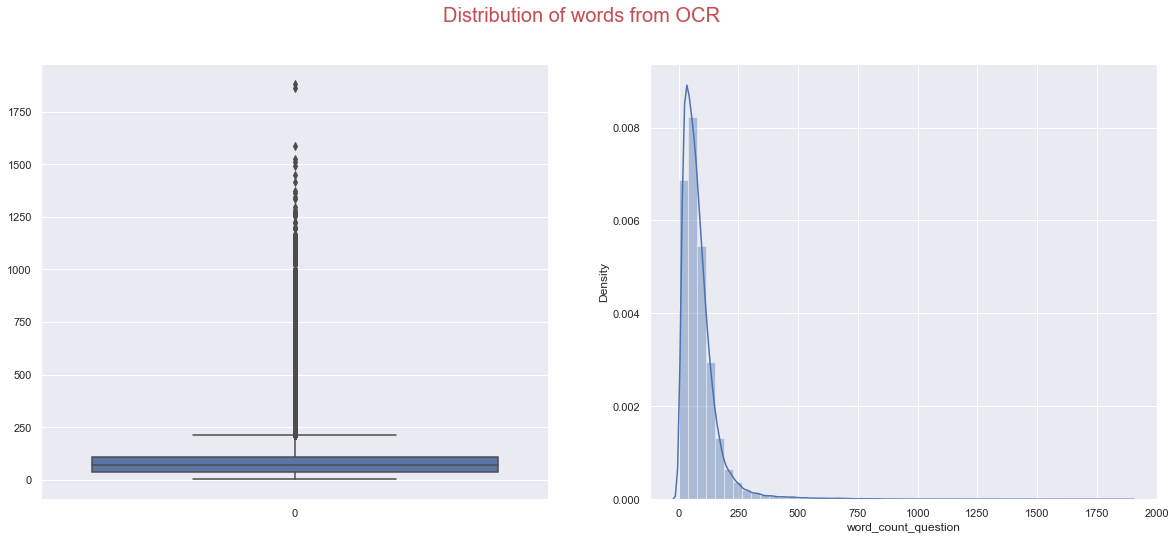

In [21]:
sb.set_theme()
plt.figure(figsize=(20, 8))
plt.subplot(121)
sb.boxplot(data = df['word_count_question'], orient = 'v')
plt.subplot(122)
sb.distplot(df['word_count_question'])
plt.suptitle('Distribution of words from OCR', fontsize = 20, color = 'r');

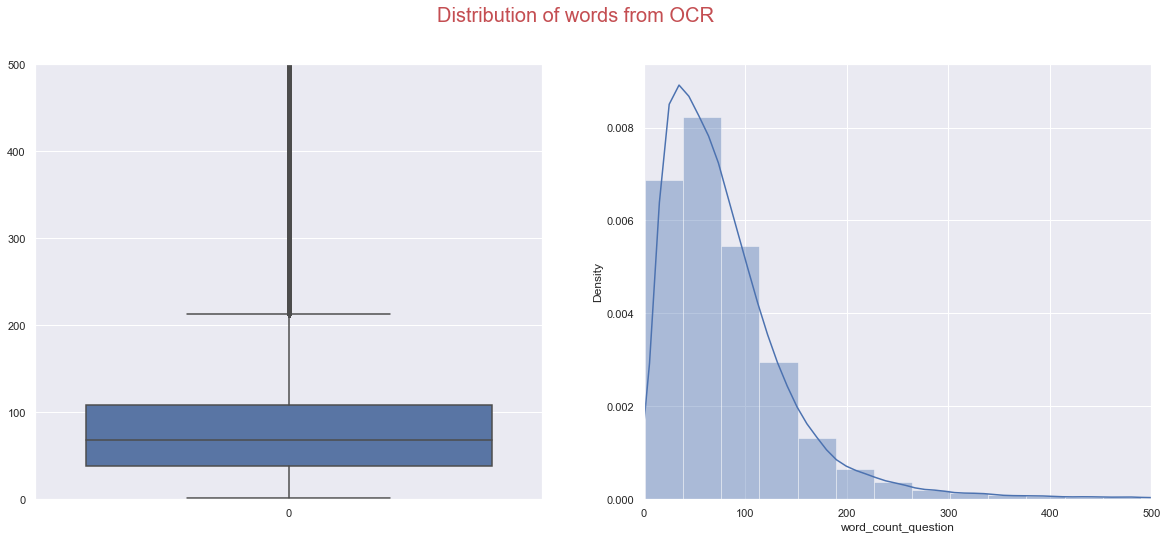

In [24]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
sb.boxplot(data = df['word_count_question'], orient = 'v')
plt.ylim([0, 500])
plt.subplot(122)
sb.distplot(df['word_count_question'])
plt.xlim([0, 500])
plt.suptitle('Distribution of words from OCR', fontsize = 20, color = 'r');

In [25]:
df_5 = df.loc[df['word_count_question'] <= 5]
df_5.shape

(739, 7)

In [26]:
df_5.head()

,QuestionID,ImageURL,ImageOCR,clean_question,char_count_question,word_count_question,average_word_length_question
57,0ee78878-4577-11ed-8355-e24590ef346b,https://s3.icankid.io/uploads/question/0dcd3350-4577-11ed-afcb-abad28552b30,tHY RN +N,thy rn + n,10,4,2.5
105,1bcb08a7-454a-11ed-8355-e24590ef346b,https://s3.icankid.io/uploads/question/1b377870-454a-11ed-afcb-abad28552b30,\( 25 \cdot 99 \),\ ( 25_\_cdot 99_\ ),20,5,4.0
232,463a33e1-4546-11ed-8355-e24590ef346b,https://s3.icankid.io/uploads/question/455af6d0-4546-11ed-afcb-abad28552b30,Chobaing s'thas,chobaing s'thas,15,2,7.5
265,5295ab3e-453c-11ed-8355-e24590ef346b,https://s3.icankid.io/uploads/question/5201fe10-453c-11ed-afcb-abad28552b30,Bai7: Cho hinh ve,bai7 : cho hinh ve,18,5,3.6
347,6a873103-4526-11ed-8355-e24590ef346b,https://s3.icankid.io/uploads/question/69b8b5a0-4526-11ed-afcb-abad28552b30,7 futurebook,7 futurebook,12,2,6.0


In [27]:
org_image = df_5['ImageURL'].values

In [94]:
post_url = 'https://data-checking.herokuapp.com/data-checking'

In [95]:
def request_API(post_url, payload):
    r = requests.post(post_url, payload)
    return r

In [96]:
c = request_API(post_url, df.iloc[0]['ImageURL'])
c.text

'"Can not read image, please try again!"'

In [77]:
def images_render(org_urls, step = 15, stop = -2, check_time = True):
    render_img = []
    s = 'image_render'
    t1 = time.time()
    for url in org_urls:
        result = request_API(post_url, {'image': url})
        try:
            idx = result.text.rindex(s)
        except ValueError:
            print('Substring not found')
            print(url)
            render_img.append('not_found')
        else:
            render_url = result.text[idx + step: stop]
            render_img.append(render_url)
    t2 = time.time()
    times = t2 - t1
    if check_time:
        if times < 60:
            print('Request took {:.2f}s.'.format(times))
        else:
            print('Request took {:.2f} minutes.'.format(times / 60))
    return render_img 

In [76]:
render_image = images_render(org_image)

Substring not found
https://s3.icankid.io/uploads/question/12debe70-d800-11ec-80fa-7dd59c10bdcf
Substring not found
https://s3.icankid.io/uploads/question/5fdd1d40-d06a-11ec-80fa-7dd59c10bdcf
Substring not found
https://s3.icankid.io/uploads/question/a573c060-cae9-11ec-80fa-7dd59c10bdcf
Substring not found
https://s3.icankid.io/uploads/question/3db299f0-3426-11ed-afcb-abad28552b30
Substring not found
https://s3.icankid.io/uploads/question/ddf81ee0-ea33-11ec-80fa-7dd59c10bdcf
Substring not found
https://s3.icankid.io/uploads/question/680a2230-e3f5-11ec-80fa-7dd59c10bdcf
Substring not found
https://s3.icankid.io/uploads/question/29d89e80-f12c-11ec-80fa-7dd59c10bdcf
Substring not found
https://s3.icankid.io/uploads/question/33c3b8f0-f2b5-11ec-80fa-7dd59c10bdcf
Substring not found
https://s3.icankid.io/uploads/question/51394f30-f12f-11ec-80fa-7dd59c10bdcf
Substring not found
https://s3.icankid.io/uploads/question/63f0a5a0-f388-11ec-80fa-7dd59c10bdcf
Substring not found
https://s3.icankid.i

In [81]:
render_image

['https://s3.stag.icankids.com.vn/uploads/question/b1c5a200-5f38-11ed-9907-a730345f7f0b',
 'https://s3.stag.icankids.com.vn/uploads/question/b4ac4730-5f38-11ed-9907-a730345f7f0b',
 'https://s3.stag.icankids.com.vn/uploads/question/b797ce60-5f38-11ed-9907-a730345f7f0b',
 'https://s3.stag.icankids.com.vn/uploads/question/baebb450-5f38-11ed-9907-a730345f7f0b',
 'https://s3.stag.icankids.com.vn/uploads/question/be02df60-5f38-11ed-9907-a730345f7f0b',
 'https://s3.stag.icankids.com.vn/uploads/question/c18db3d0-5f38-11ed-9907-a730345f7f0b',
 'https://s3.stag.icankids.com.vn/uploads/question/c5565490-5f38-11ed-9907-a730345f7f0b',
 'https://s3.stag.icankids.com.vn/uploads/question/c85f9cf0-5f38-11ed-9907-a730345f7f0b',
 'https://s3.stag.icankids.com.vn/uploads/question/cb8c4bd0-5f38-11ed-9907-a730345f7f0b',
 'https://s3.stag.icankids.com.vn/uploads/question/cf0768d0-5f38-11ed-9907-a730345f7f0b',
 'https://s3.stag.icankids.com.vn/uploads/question/d24c3390-5f38-11ed-9907-a730345f7f0b',
 'https://

In [56]:
out_len = [x for x in org_image if len(x) > 75]
out_len

['https://s3.stag.icankids.com.vn/uploads/question/927a09e0-a4da-11ec-aff6-effb0425a586',
 'https://s3.stag.icankids.com.vn/uploads/question/13ab7a90-b0bf-11ec-aff6-effb0425a586',
 'https://s3.stag.icankids.com.vn/uploads/question/71a847c0-a649-11ec-aff6-effb0425a586']

In [67]:
org_image[75]

'https://s3.icankid.io/uploads/question/70a86580-47cf-11ed-afcb-abad28552b30'

In [46]:
def display_pairs_image(url_lst, render_lst):
    import requests
    import IPython.display as Disp
    idx = 1
    for url1, url2 in zip(url_lst, render_lst):
        img1 = Disp.Image(requests.get(url1).content)
        img2 = Disp.Image(requests.get(url2).content)
        print('Pairs:', idx)
        display(img1, img2)
        idx += 1

In [85]:
def display_image(url_render):
    import requests
    import IPython.display as Disp
    img1 = Disp.Image(requests.get(url_render).content)
    display(img1)

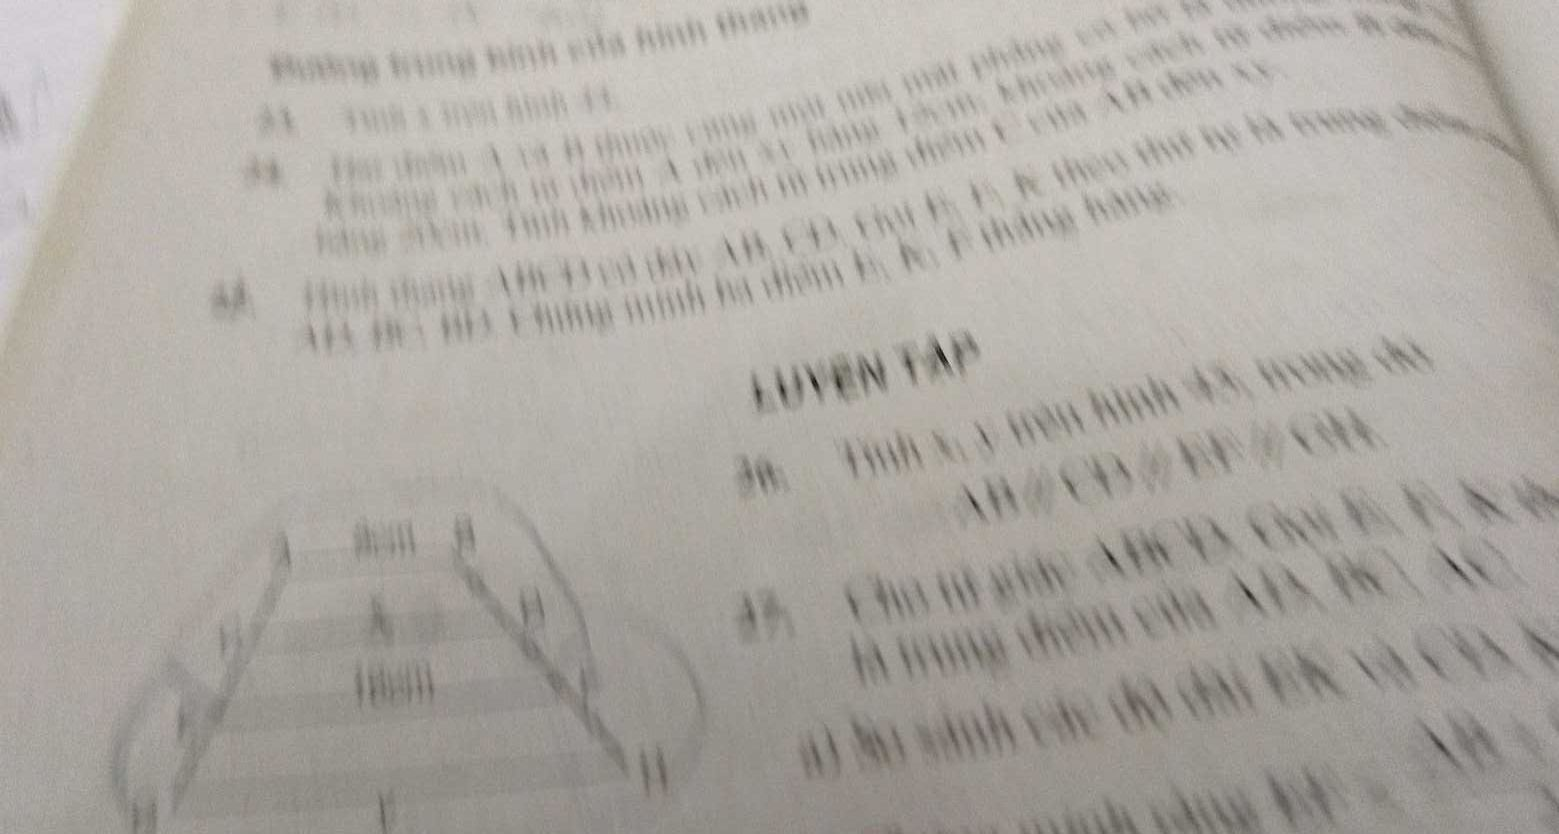

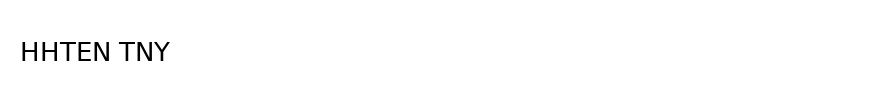

In [87]:
display_image(org_image[0])
display_image(render_image[0])

In [50]:
def image_render(org_url, a = 'image_render', step = 15, stop = -2, check_time = True):    
    t1 = time.time()
    result = request_API(post_url, {'image': org_url})
    idx = result.text.rindex(a)
    render_url = result.text[idx + step: stop]
    t2 = time.time()
    times = t2 - t1
    if check_time:
        if times < 60:
            print('Request took {:.2f}s.'.format(times))
        else:
            print('Request took {:.2f}s.'.format(times / 60))
    return render_url

In [71]:
demo = image_render(org_image[74])
demo

Request took 3.94s.


'https://s3.stag.icankids.com.vn/uploads/question/3017fd10-5f34-11ed-9907-a730345f7f0b'

In [ ]:
s = 'image_render'
render_img = []
t1 = time.time()
for url in :
    result = request_API(post_url, {"image": url})
    idx = result.text.rindex(s)
    render_url = result.text[idx+15: -2]
    render_img.append(render_url)
t2 = time.time()

print('Request took {:.2f}s.'.format(t2 - t1))

In [ ]:
idx = 1
for url1, url2 in zip(org_urls, render_img):
    img1 = Disp.Image(requests.get(url1).content)
    img2 = Disp.Image(requests.get(url2).content)
    print('Pairs:', idx)
    display(img1, img2)
    idx += 1